<a href="https://colab.research.google.com/github/minakshimohanty/Diabetic-Retinopathy-Detection/blob/master/VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
X_train = np.load('/content/drive/My Drive/Capstone 1/train_data_224.npy')
y_train = np.load('/content/drive/My Drive/Capstone 1/train_labels_224.npy')
X_test = np.load('/content/drive/My Drive/Capstone 1/test_data_224.npy')
y_test = np.load('/content/drive/My Drive/Capstone 1/test_labels_224.npy')

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

model_vgg = VGG19(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = model_vgg.layers[-1].output
output = keras.layers.Flatten()(output)
model_vgg = Model(model_vgg.input, outputs=output)
for layer in model_vgg.layers:
    layer.trainable = True
model_vgg.summary() 

80142336/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model =  Sequential()
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
model.add(model_vgg)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 25088)             20024384  
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 33,135,173
Trainable params: 33,135,173
Non-trainable params: 0
____________________________________________

In [8]:
batch_size = 128
epochs = 30
num_classes = 5
X_train_norm = X_train/255
eyetest_train = model.fit(X_train_norm, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1) 

Epoch 1/30
19/19 [==============================] - 19s 981ms/step - loss: 1.0620 - accuracy: 0.6149 - val_loss: 1.0376 - val_accuracy: 0.6304
Epoch 2/30
19/19 [==============================] - 18s 927ms/step - loss: 0.8235 - accuracy: 0.7003 - val_loss: 0.9438 - val_accuracy: 0.6693
Epoch 3/30
19/19 [==============================] - 18s 928ms/step - loss: 0.7857 - accuracy: 0.7051 - val_loss: 0.8749 - val_accuracy: 0.6926
Epoch 4/30
19/19 [==============================] - 18s 928ms/step - loss: 0.7340 - accuracy: 0.7229 - val_loss: 0.8738 - val_accuracy: 0.7432
Epoch 5/30
19/19 [==============================] - 18s 926ms/step - loss: 0.7517 - accuracy: 0.7459 - val_loss: 0.7372 - val_accuracy: 0.7510
Epoch 6/30
19/19 [==============================] - 18s 926ms/step - loss: 0.7082 - accuracy: 0.7580 - val_loss: 4.2296 - val_accuracy: 0.2296
Epoch 7/30
19/19 [==============================] - 18s 928ms/step - loss: 0.8734 - accuracy: 0.7116 - val_loss: 0.7382 - val_accuracy: 0.6693

In [9]:
X_test_norm = X_test/255
eyetest_eval = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', eyetest_eval[0])
print('Test accuracy:', eyetest_eval[1])

Test loss: 1.5517772436141968
Test accuracy: 0.6542311310768127


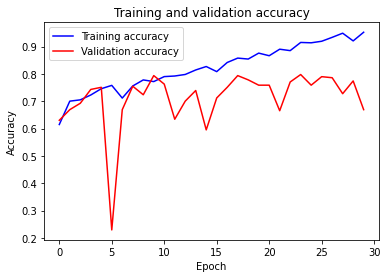

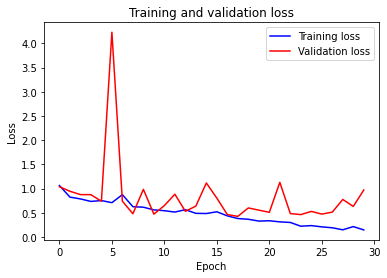

In [10]:
accuracy = eyetest_train.history['accuracy']
loss = eyetest_train.history['loss']
val_accuracy = eyetest_train.history['val_accuracy']
val_loss = eyetest_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# predictions
y_pred = model.predict(X_test)

In [0]:
def decode(datum):
    return np.argmax(datum)
    

In [0]:
y_pred_decoded = []
for i in range(y_pred.shape[0]):
    y_pred_decoded.append(decode(y_pred[i]))

In [0]:
y_test_decoded = []
for i in range(y_test.shape[0]):
    y_test_decoded.append(decode(y_test[i]))

In [0]:
compare = np.column_stack((y_test_decoded, y_pred_decoded))

In [16]:
from sklearn.metrics import classification_report
#multilabel_confusion_matrix(y_test_decoded, y_pred_decoded)
target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
print(classification_report(y_test_decoded, y_pred_decoded, target_names=target_names))

                  precision    recall  f1-score   support

           No DR       0.82      0.99      0.89       540
            Mild       1.00      0.01      0.02        98
        Moderate       0.68      0.21      0.32       302
          Severe       0.19      0.35      0.24        55
Proliferative DR       0.27      0.64      0.38       104

        accuracy                           0.62      1099
       macro avg       0.59      0.44      0.37      1099
    weighted avg       0.71      0.62      0.58      1099



In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_decoded, y_pred_decoded, labels= [0,1,2,3,4]))

[[533   0   0   0   7]
 [ 41   1  13   3  40]
 [ 59   0  63  64 116]
 [ 10   0   5  19  21]
 [  9   0  12  16  67]]
